In [1]:
import duckdb as ddb

c = ddb.connect("nyc-taxi.duckdb")
c

In [2]:
yellow_parquets = "data/yellow/data.parquet/*/*.parquet"
green_parquets = "data/green/data.parquet/*/*.parquet"

In [3]:
%%time
run_create_table = True

create_table = f"""
create table yellow as 
select 
    * 
from read_parquet('{yellow_parquets}')
""".lstrip()

if run_create_table:
    c.execute(create_table)

CPU times: user 2min 19s, sys: 2min 39s, total: 4min 59s
Wall time: 9min 21s


In [4]:
%%time
run_create_table = True

create_table = f"""
create table green as 
select 
    * 
from read_parquet('{green_parquets}')
""".lstrip()

if run_create_table:
    c.execute(create_table)

CPU times: user 1min 2s, sys: 48.2 s, total: 1min 50s
Wall time: 4min 57s


In [5]:
query = """
select
    count(*) as num_rows_yellow
from yellow
""".lstrip()

out = c.execute(query).fetchall()
out

[(255694395,)]

In [6]:
yellow_rows = out[0][0]
yellow_rows

255694395

In [7]:
query = """
select
    count(*) as num_rows_green
from green
""".lstrip()

out = c.execute(query).fetchall()
out

[(18290201,)]

In [8]:
green_rows = out[0][0]
green_rows

18290201

In [9]:
to_print = f"""
yellow_rows: {yellow_rows:10}
green_rows : {green_rows:10}
""".lstrip()

print(to_print)

yellow_rows:  255694395
green_rows :   18290201



In [10]:
yellow_rows > green_rows

True

In [11]:
%%time
# df = c.execute("select * from yellow limit 1000000;").df()
df = c.execute("select * from green;").df()
df.head()

CPU times: user 3.62 s, sys: 5.64 s, total: 9.26 s
Wall time: 10.5 s


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-02-01 00:20:21,2022-02-01 00:24:30,N,1.0,43,238,1.0,1.16,5.5,0.5,0.5,1.02,0.0,NaN,0.3,7.82,1.0,1.0,0.00
1,2,2022-02-01 00:32:26,2022-02-01 00:35:31,N,1.0,166,24,1.0,0.57,4.5,0.5,0.5,0.00,0.0,NaN,0.3,5.80,2.0,1.0,0.00
2,1,2022-02-01 00:17:27,2022-02-01 00:44:44,N,1.0,226,219,1.0,0.00,42.2,0.0,0.5,0.00,0.0,NaN,0.3,43.00,1.0,1.0,0.00
3,2,2022-02-01 00:45:37,2022-02-01 01:27:16,N,1.0,89,83,1.0,16.62,49.0,0.5,0.5,0.00,0.0,NaN,0.3,50.30,2.0,1.0,0.00
4,2,2022-02-01 00:06:46,2022-02-01 00:30:06,N,1.0,7,238,1.0,5.97,21.0,0.5,0.5,4.50,0.0,NaN,0.3,29.55,1.0,1.0,2.75


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18290201 entries, 0 to 18290200
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     object        
 4   RatecodeID             float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   passenger_count        float64       
 8   trip_distance          float64       
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  ehail_fee              float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  payment_type           float64       
 18  trip_type           

In [13]:
mbs = df.memory_usage(deep=True, index=True).sum() // 1e6
print(f"MBs: {mbs}")

MBs: 3795.0


In [14]:
%%time
df.describe()

CPU times: user 6.5 s, sys: 1.39 s, total: 7.89 s
Wall time: 7.93 s


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,1.829020e+07,1.654466e+07,1.829020e+07,1.829020e+07,1.654466e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,3052.000000,1.829020e+07,1.829020e+07,1.654466e+07,1.654153e+07,7.200018e+06
mean,1.853913e+00,1.142970e+00,1.096777e+02,1.292855e+02,1.328542e+00,1.436395e+01,1.501884e+01,5.096239e-01,4.611950e-01,1.029775e+00,2.659391e-01,0.024902,2.784097e-01,1.773906e+01,1.439916e+00,1.033984e+00,4.456401e-01
std,3.535406e-01,7.878242e-01,7.269836e+01,7.663923e+01,9.989035e-01,1.129670e+03,1.377123e+01,8.157112e-01,1.401550e-01,2.076675e+00,1.394288e+00,0.221809,8.045773e-02,1.504428e+01,5.193124e-01,1.811885e-01,1.013364e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.032908e+04,-8.900000e+02,-2.542000e+01,-5.000000e-01,-1.000000e+02,-2.100000e+01,0.000000,-3.000000e-01,-8.903000e+02,1.000000e+00,1.000000e+00,-2.750000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.400000e+01,1.000000e+00,1.100000e+00,7.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000,3.000000e-01,8.760000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,2.030000e+00,1.050000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000,3.000000e-01,1.288000e+01,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,4.200000e+00,1.874000e+01,5.000000e-01,5.000000e-01,1.760000e+00,0.000000e+00,0.000000,3.000000e-01,2.196000e+01,2.000000e+00,1.000000e+00,0.000000e+00
max,6.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,4.800000e+01,3.343032e+05,1.044584e+04,2.715000e+01,8.291000e+01,6.412000e+02,9.355000e+02,2.000000,4.700000e-01,1.052875e+04,5.000000e+00,2.000000e+00,2.750000e+00


In [15]:
import numpy as np
import dask.dataframe as dd

from distributed import Client

In [16]:
dc = Client()
dc

2022-07-17 13:32:49,449 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-cj21qrr8', purging
2022-07-17 13:32:49,449 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-voza5_6b', purging
2022-07-17 13:32:49,449 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-bpwl8jed', purging
2022-07-17 13:32:49,450 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/_0/t5bjjwjn59d2y86rr301hl380000gp/T/dask-worker-space/worker-8ni77dm3', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:65293,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:65390,Total threads: 2
Dashboard: http://127.0.0.1:65397/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:65297,


In [17]:
%%time
engine = "pyarrow"
# engine = "fastparquet"

columns = {
    "VendorID": np.int64,
    "lpep_pickup_datetime": np.datetime64,
    "lpep_dropoff_datetime": np.datetime64,
    "store_and_fwd_flag": str,
    "RatecodeID": np.float64,
    "PULocationID": np.int64,
    "DOLocationID": np.int64,
    "passenger_count": np.float64,
    "trip_distance": np.float64,
    "fare_amount": np.float64,
    "extra": np.float64,
    "mta_tax": np.float64,
    "tip_amount": np.float64,
    "tolls_amount": np.float64,
    # "ehail_fee": np.float64,
    "improvement_surcharge": np.float64,
    "total_amount": np.float64,
    "payment_type": np.float64,
    "trip_type": np.float64,
    # "congestion_surcharge": np.float64,
}
ddf = dd.read_parquet(green_parquets, columns=columns, engine=engine)

CPU times: user 14.3 ms, sys: 13.4 ms, total: 27.6 ms
Wall time: 83.3 ms


In [18]:
%%time
ddf.describe().compute()

CPU times: user 3.33 s, sys: 629 ms, total: 3.96 s
Wall time: 11.6 s


,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1.829020e+07,1.654466e+07,1.829020e+07,1.829020e+07,1.654466e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.829020e+07,1.654466e+07,1.654153e+07
mean,1.853913e+00,1.142970e+00,1.096777e+02,1.292855e+02,1.328542e+00,1.436395e+01,1.501884e+01,5.096239e-01,4.611950e-01,1.029775e+00,2.659391e-01,2.784097e-01,1.773906e+01,1.439916e+00,1.033984e+00
std,3.535406e-01,7.878242e-01,7.269836e+01,7.663923e+01,9.989035e-01,1.129670e+03,1.377123e+01,8.157112e-01,1.401550e-01,2.076675e+00,1.394288e+00,8.045773e-02,1.504428e+01,5.193124e-01,1.811885e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.032908e+04,-8.900000e+02,-2.542000e+01,-5.000000e-01,-1.000000e+02,-2.100000e+01,-3.000000e-01,-8.903000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,6.500000e+01,7.400000e+01,1.000000e+00,1.410000e+00,9.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.380000e+02,1.000000e+00,3.050000e+00,1.420000e+01,5.000000e-01,5.000000e-01,1.290000e+00,0.000000e+00,3.000000e-01,1.700000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.680000e+02,2.170000e+02,1.000000e+00,7.320000e+00,2.765000e+01,2.750000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,3.250000e+01,2.000000e+00,1.000000e+00
max,6.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,4.800000e+01,3.343032e+05,1.044584e+04,2.715000e+01,8.291000e+01,6.412000e+02,9.355000e+02,4.700000e-01,1.052875e+04,5.000000e+00,2.000000e+00


In [19]:
%%time

operators = ["count", "favg", "stddev_pop", "min", "max"]

in_select = ""
for column in columns:
    if columns[column] in (np.int64, np.float64):
        for operator in operators:
            in_select += f"\n{operator}({column}),"
            if columns[column] is np.float64:
                for quantile in range(25, 100, 25):
                    in_select += f"\nquantile_disc({column}, {quantile/100}),"

query = f"""
select 
    {in_select.lstrip().rstrip(",")}
from green
--from read_parquet('{green_parquets}')
""".lstrip().rstrip()

# query += "\ngroup by"
# for column in columns:
#    query += f" {column},"
# query = query.rstrip(",")

print(query)

out = c.execute(query).fetchall()
out

select 
    count(VendorID),
favg(VendorID),
stddev_pop(VendorID),
min(VendorID),
max(VendorID),
count(RatecodeID),
quantile_disc(RatecodeID, 0.25),
quantile_disc(RatecodeID, 0.5),
quantile_disc(RatecodeID, 0.75),
favg(RatecodeID),
quantile_disc(RatecodeID, 0.25),
quantile_disc(RatecodeID, 0.5),
quantile_disc(RatecodeID, 0.75),
stddev_pop(RatecodeID),
quantile_disc(RatecodeID, 0.25),
quantile_disc(RatecodeID, 0.5),
quantile_disc(RatecodeID, 0.75),
min(RatecodeID),
quantile_disc(RatecodeID, 0.25),
quantile_disc(RatecodeID, 0.5),
quantile_disc(RatecodeID, 0.75),
max(RatecodeID),
quantile_disc(RatecodeID, 0.25),
quantile_disc(RatecodeID, 0.5),
quantile_disc(RatecodeID, 0.75),
count(PULocationID),
favg(PULocationID),
stddev_pop(PULocationID),
min(PULocationID),
max(PULocationID),
count(DOLocationID),
favg(DOLocationID),
stddev_pop(DOLocationID),
min(DOLocationID),
max(DOLocationID),
count(passenger_count),
quantile_disc(passenger_count, 0.25),
quantile_disc(passenger_count, 0.5),
quantile_

[(18290201,
  1.8539133058187824,
  0.3535406171194786,
  1,
  6,
  16544660,
  1.0,
  1.0,
  1.0,
  1.142970420667454,
  1.0,
  1.0,
  1.0,
  0.787824169397494,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  99.0,
  1.0,
  1.0,
  1.0,
  18290201,
  109.67772267784264,
  72.69835306049573,
  1,
  265,
  18290201,
  129.2854523577953,
  76.63922452296154,
  1,
  265,
  16544660,
  1.0,
  1.0,
  1.0,
  1.3285417167835423,
  1.0,
  1.0,
  1.0,
  0.9989035174817538,
  1.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  48.0,
  1.0,
  1.0,
  1.0,
  18290201,
  1.1,
  2.03,
  4.2,
  14.363947730262778,
  1.1,
  2.03,
  4.2,
  1129.670170552448,
  1.1,
  2.03,
  4.2,
  -20329.08,
  1.1,
  2.03,
  4.2,
  334303.19,
  1.1,
  2.03,
  4.2,
  18290201,
  7.0,
  10.5,
  18.74,
  15.018838163123522,
  7.0,
  10.5,
  18.74,
  13.77123275637693,
  7.0,
  10.5,
  18.74,
  -890.0,
  7.0,
  10.5,
  18.74,
  10445.84,
  7.0,
  10.5,
  18.74,
  18290201,
  0.0,
  0.0,
  0.5,
  0.5096239150132904,
  0.0,
 

In [20]:
%%time

query = f"""
select 
    max(fare_amount)
from read_parquet('{green_parquets}')
""".lstrip()

max_fare = c.execute(query).fetchall()[0][0]
max_fare

CPU times: user 445 ms, sys: 50.7 ms, total: 496 ms
Wall time: 143 ms


10445.84

In [21]:
%%time

query = f"""
select 
    trip_distance,
    passenger_count,
    tip_amount,
    tolls_amount,
    ehail_fee,
    mta_tax,
    improvement_surcharge,
    total_amount,
    payment_type,
    congestion_surcharge
from read_parquet('{green_parquets}')
where fare_amount={max_fare}
""".lstrip()

out = c.execute(query).fetchall()
out

CPU times: user 63.2 ms, sys: 6.26 ms, total: 69.4 ms
Wall time: 73.5 ms


[(482.8, 1.0, 0.0, 0.0, None, 82.91, 0.0, 10528.75, 2.0, None)]

In [22]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [23]:
import seaborn as sns

In [24]:
query = f"""
select 
    tip_amount
from yellow
where tip_amount is not null
order by tip_amount desc
limit 100000
""".lstrip()

out = c.execute(query)
out

In [25]:
test = out.df()
test.values

array([[1.4149202e+05],
       [1.6246400e+03],
       [1.3935600e+03],
       ...,
       [2.7460000e+01],
       [2.7460000e+01],
       [2.7460000e+01]])

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns.set(rc={"figure.figsize": (16, 18)})
plt.style.use("dark_background")

(0.0, 12000.0)

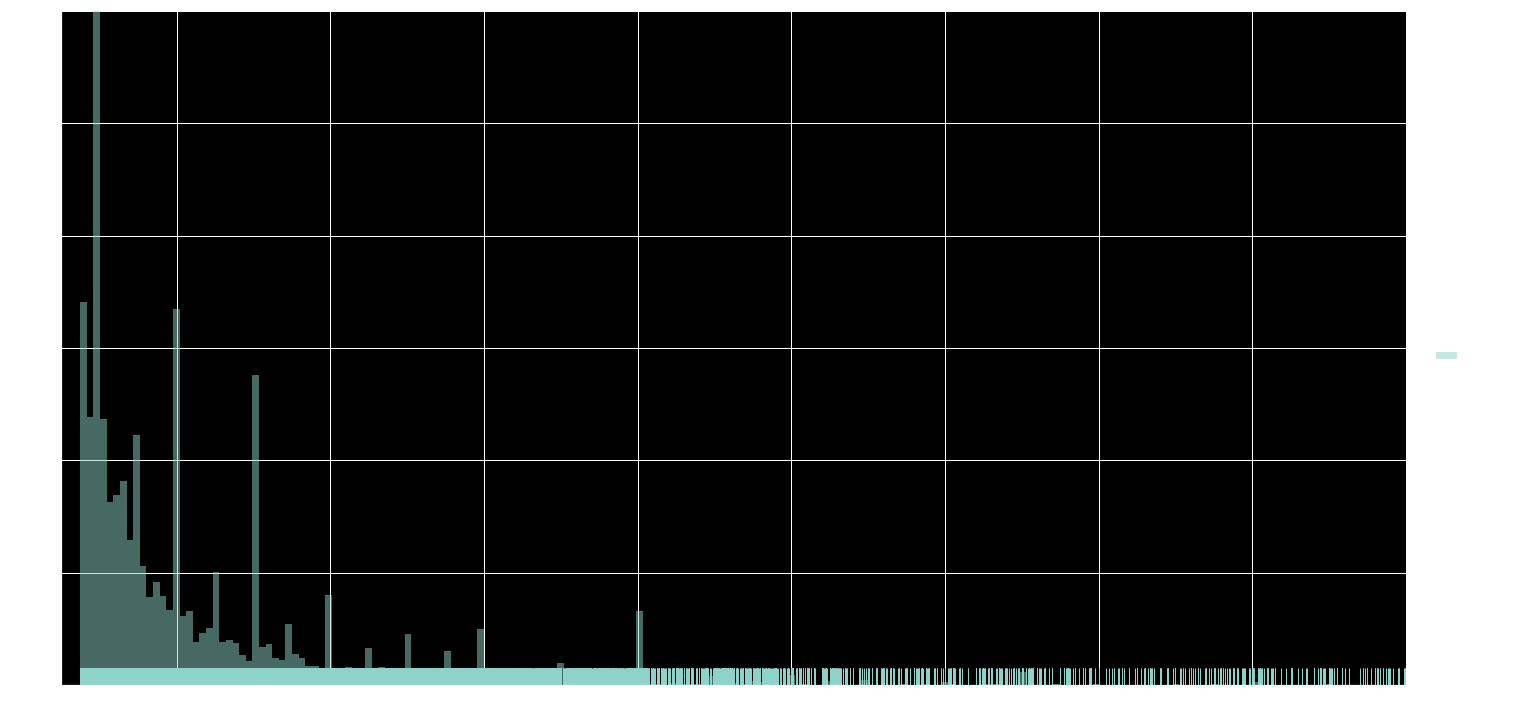

In [27]:
sns.displot(data=test, rug=True, height=10, aspect=2.0, kind="hist")
plt.xlim(25, 200)
plt.ylim(0, 12000)

In [28]:
query = f"""
select 
    total_amount,
    fare_amount,
    tip_amount
from yellow
where tip_amount is not null
and tip_amount < 100000
and total_amount < 2000
order by tip_amount desc
limit 100000
""".lstrip()

out = c.execute(query)
out

In [29]:
test = out.df()
test.head()

,total_amount,fare_amount,tip_amount
0,1110.80,6.5,1100.00
1,1010.80,6.5,1001.00
2,1008.29,4.5,999.99
3,952.77,5.5,945.97
4,899.68,7.0,888.88


<AxesSubplot:>

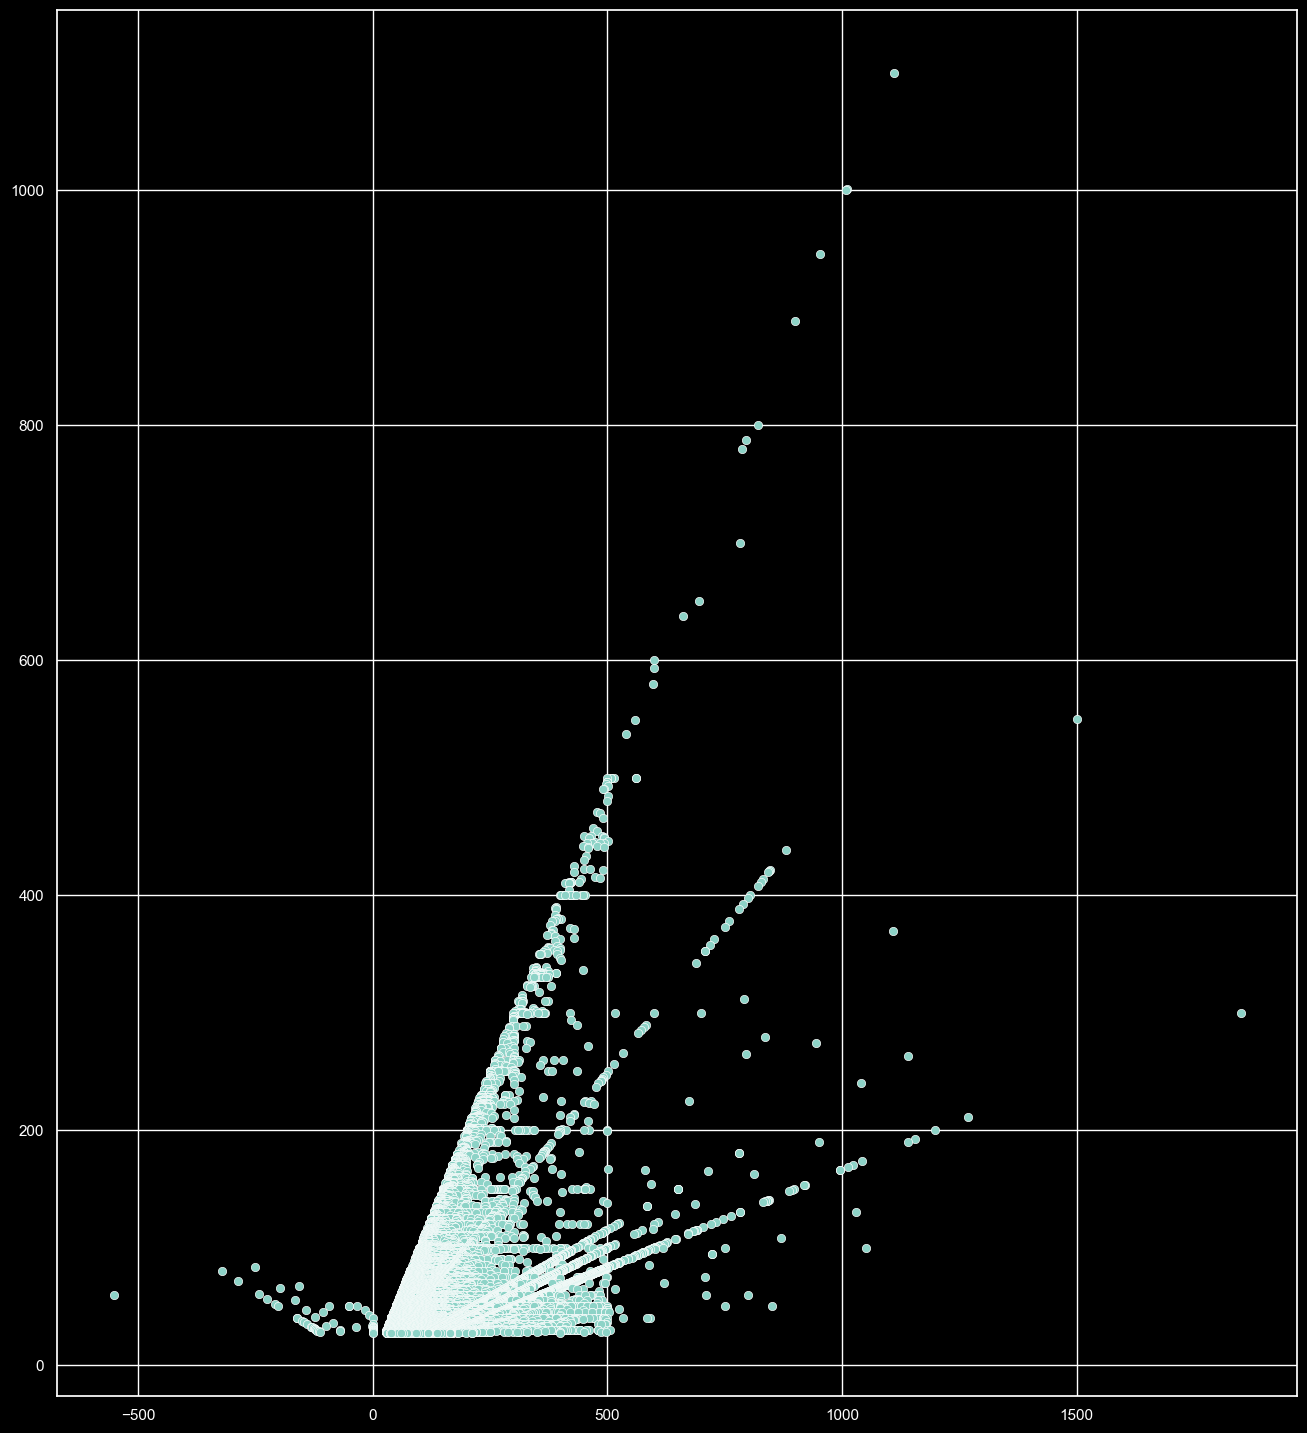

In [30]:
sns.scatterplot(y=test["tip_amount"].values, x=test["total_amount"].values)

In [31]:
query = f"""
select 
    count(*)
from yellow
where fare_amount < 0
or total_amount < 0
""".lstrip()

out = c.execute(query)
out.fetchall()

[(539066,)]

In [32]:
query = f"""
select 
    count(*)
from yellow
where tip_amount < 0
""".lstrip()

out = c.execute(query)
out.fetchall()

[(7299,)]

In [33]:
c.close()
dc.close()